In [1]:
import torch
import torch.optim as optim
from src.env.pig_game import PigGame
from src.env.dummy_player import DummyPlayer 
from src.model.actor_critic import Actor, Critic
from src.loop.training_loop import training_loop

In [2]:
torch.manual_seed(1)

In [3]:
env = PigGame()

actor = Actor()  
critic = Critic()

dummy = DummyPlayer()

In [4]:
actor_optimizer = optim.Adam(actor.parameters(), lr=1e-3)
critic_optimizer = optim.Adam(critic.parameters(), lr=1e-3)

num_episodes = 1e3
gamma = 0.99

In [5]:
rewards, game_scores, actor_loss, critic_loss = training_loop(
    env=env, 
    actor=actor, 
    critic=critic, 
    dummy=dummy, 
    actor_optimizer=actor_optimizer, 
    critic_optimizer=critic_optimizer, 
    gamma=gamma, 
    num_episodes=int(num_episodes), 
    debug=False
)

Episode 0 finished, Total Reward: -57.0
Episode 100 finished, Total Reward: 4.0
Episode 200 finished, Total Reward: -6.0
Episode 300 finished, Total Reward: 10.0
Episode 400 finished, Total Reward: 7.0
Episode 500 finished, Total Reward: 14.0
Episode 600 finished, Total Reward: 3.0
Episode 700 finished, Total Reward: 7.0
Episode 800 finished, Total Reward: 11.0
Episode 900 finished, Total Reward: 16.0


In [6]:
import numpy as np

def moving_average(values, window):
    """
    Computes the moving average of the values with the given window size.
    
    Parameters:
    - values: List or array of rewards
    - window: Window size for the moving average
    
    Returns:
    - moving_avg: Array of moving average values
    """
    return np.convolve(values, np.ones(window) / window, mode='valid')

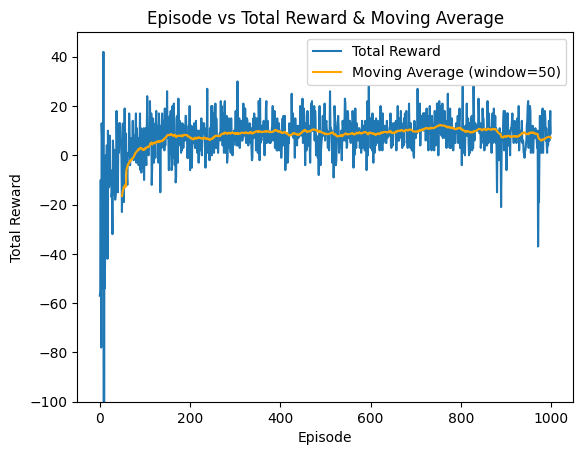

In [9]:
import matplotlib.pyplot as plt

window_size = 50
moving_avg_rewards = moving_average(rewards, window_size)

plt.plot(range(len(rewards)), rewards, label='Total Reward')
plt.plot(range(window_size - 1, len(rewards)), moving_avg_rewards, label=f'Moving Average (window={window_size})', color='orange')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.ylim([-100,50])
# plt.xlim([0,200])
plt.title('Episode vs Total Reward & Moving Average')
plt.legend()

plt.show()


Dummy won 148 times.
NN (AI) won 852 times.
AI won 85.20% of the time.


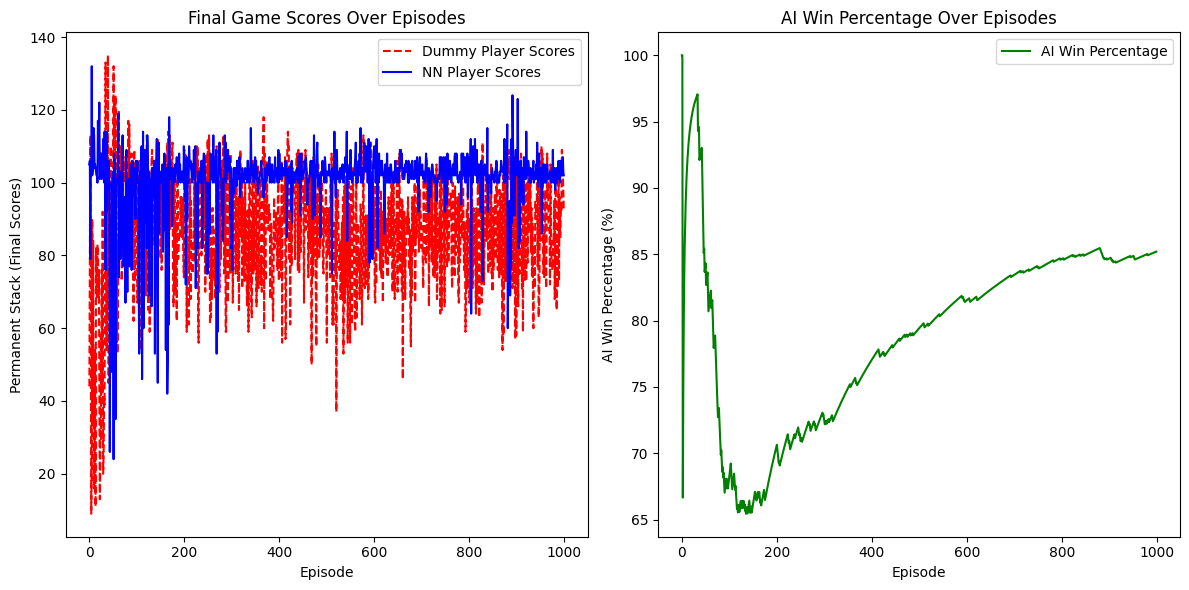

In [17]:
import matplotlib.pyplot as plt

def plot_game_scores_and_wins(game_scores, num_episodes):
    """
    Plot the game scores for the NN and Dummy player over episodes.
    Also calculate and print how many times NN won, how many times Dummy won,
    and the percentage of games won by the NN.

    Parameters:
    - game_scores: A list of lists, where each element contains two sublists (dummy scores, NN scores).
    - num_episodes: Number of episodes to plot (x-axis).
    """
    # Separate the dummy and NN scores from the game_scores
    dummy_scores = [score[0][0] for score in game_scores]  # Dummy player scores
    nn_scores = [score[0][1] for score in game_scores]     # NN player scores
    
    # Initialize win counters
    dummy_wins = 0
    nn_wins = 0
    nn_win_percentage = []

    # Count wins for each player
    for i in range(num_episodes):
        if nn_scores[i] >= 100:  # NN wins
            nn_wins += 1
        elif dummy_scores[i] >= 100:  # Dummy wins
            dummy_wins += 1
        
        # Calculate the running percentage of AI wins
        nn_win_percentage.append((nn_wins / (i + 1)) * 100)

    # Print total wins and percentages
    print(f"Dummy won {dummy_wins} times.")
    print(f"NN (AI) won {nn_wins} times.")
    print(f"AI won {nn_wins / num_episodes * 100:.2f}% of the time.")

    # Create the score plot
    plt.figure(figsize=(12, 6))
    
    # Plot dummy scores
    plt.subplot(1, 2, 1)
    plt.plot(range(num_episodes), dummy_scores, label="Dummy Player Scores", color='red', linestyle='--')
    plt.plot(range(num_episodes), nn_scores, label="NN Player Scores", color='blue')
    plt.xlabel('Episode')
    plt.ylabel('Permanent Stack (Final Scores)')
    plt.title('Final Game Scores Over Episodes')
    plt.legend()

    # Plot percentage of NN (AI) wins over episodes
    plt.subplot(1, 2, 2)
    plt.plot(range(num_episodes), nn_win_percentage, label='AI Win Percentage', color='green')
    plt.xlabel('Episode')
    plt.ylabel('AI Win Percentage (%)')
    plt.title('AI Win Percentage Over Episodes')
    plt.legend()

    # Show both plots
    plt.tight_layout()
    plt.show()
plot_game_scores_and_wins(game_scores, 1000)

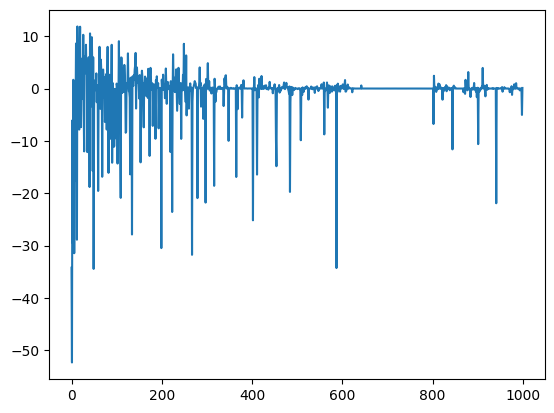

In [21]:
plt.plot(actor_loss)

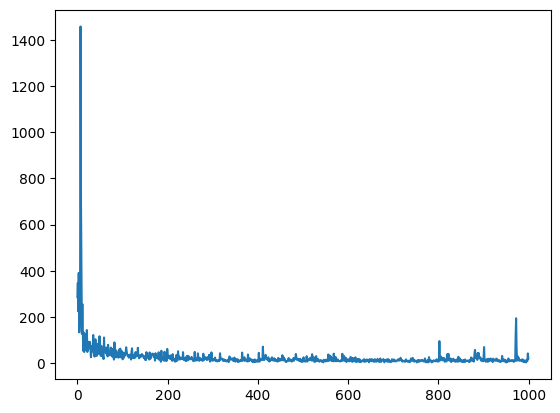

In [20]:
plt.plot(critic_loss)